In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Used for calculating theoretical value
from scipy.special import factorial
import scipy.stats as stats


In [2]:
df = pd.read_csv("data/tumor_diagnose.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df = df.drop('id', 1)

In [6]:
df = df.drop('Unnamed: 32', 1)

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df.shape

(569, 31)

In [10]:
def normal_mu(df_column):
    n = df_column.shape[0]
    return np.sum(df_column) / n

In [11]:
normal_mu(df['radius_mean'])

14.127291739894552

In [12]:
def normal_sigma(df_column, mu):
    n = df_column.shape[0]
    return np.sqrt((np.sum((df_column - mu)**2)/n))

In [13]:
normal_sigma(df['radius_mean'], 14.127291739894552)

3.520950760711062

In [14]:
def likelihood_normal(df_column):
    n = df_column.shape[0]
    mu = normal_mu(df_column)
    sigma = normal_sigma(df_column, mu)
    #first_term = -1 * n * np.log(2*math.pi) / 2
    #second_term = -1 * n * np.log(sigma)
    #third_term = -1 * n * np.sum((df_column-mu)**2) / (2*sigma**2)
    #return first_term + second_term + third_term
    return np.sum(stats.norm.pdf(df_column, loc=mu,scale=sigma))

In [15]:
likelihood_normal(df['radius_mean'])

46.361730553097416

In [16]:
def rayleigh_theta(df_column):
    n = df_column.shape[0]
    return np.sum(df_column**2)/(2*n)

In [17]:
rayleigh_theta(df['radius_mean'])

105.98873308172232

In [18]:
def likelihood_rayleigh(df_column):
    #n = df_column.shape[0]
    #theta = rayleigh_theta(df_column)
    param = stats.rayleigh.fit(df_column)
    #first_term = np.sum(np.log(df_column))
    #second_term = -1 * n * np.log(theta)
    #third_term = -1 * np.sum(df_column**2)/(2*theta)
    #return first_term + second_term + third_term
    return np.sum(stats.rayleigh.pdf(df_column,loc=param[0],scale=param[1]))

In [19]:
likelihood_rayleigh(df['radius_mean'])

47.06684571493166

In [20]:
print(likelihood_normal(df['radius_mean']))
print(likelihood_rayleigh(df['radius_mean']))

46.361730553097416
47.06684571493166


In [23]:
def getDistributionName(df_column):
    dist = {
        "likelihood_normal":likelihood_normal(df_column),
        "likelihood_rayleigh":likelihood_rayleigh(df_column)
    }
    dist = {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}
    return list(dist.keys())[1]

In [24]:
getDistributionName(df['radius_mean'])

'likelihood_rayleigh'

In [25]:
columns = df.shape[1]
columns_name = df.columns
print(columns)

31


In [26]:
for i in range(1,columns):
    #print(columns_name[i])
    column_name = columns_name[i]
    print(column_name + " -- " + getDistributionName(df[column_name]))

radius_mean -- likelihood_rayleigh
texture_mean -- likelihood_normal
perimeter_mean -- likelihood_rayleigh
area_mean -- likelihood_rayleigh
smoothness_mean -- likelihood_normal
compactness_mean -- likelihood_rayleigh
concavity_mean -- likelihood_rayleigh
concave points_mean -- likelihood_rayleigh
symmetry_mean -- likelihood_normal
fractal_dimension_mean -- likelihood_rayleigh
radius_se -- likelihood_rayleigh
texture_se -- likelihood_rayleigh
perimeter_se -- likelihood_rayleigh
area_se -- likelihood_rayleigh
smoothness_se -- likelihood_rayleigh
compactness_se -- likelihood_rayleigh
concavity_se -- likelihood_rayleigh
concave points_se -- likelihood_normal
symmetry_se -- likelihood_rayleigh
fractal_dimension_se -- likelihood_rayleigh
radius_worst -- likelihood_rayleigh
texture_worst -- likelihood_normal
perimeter_worst -- likelihood_rayleigh
area_worst -- likelihood_rayleigh
smoothness_worst -- likelihood_normal
compactness_worst -- likelihood_rayleigh
concavity_worst -- likelihood_rayle

(array([ 6., 10., 20., 60., 80., 93., 83., 78., 55., 24., 21.,  7.,  9.,
         7.,  2.,  6.,  3.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([0.1565  , 0.176792, 0.197084, 0.217376, 0.237668, 0.25796 ,
        0.278252, 0.298544, 0.318836, 0.339128, 0.35942 , 0.379712,
        0.400004, 0.420296, 0.440588, 0.46088 , 0.481172, 0.501464,
        0.521756, 0.542048, 0.56234 , 0.582632, 0.602924, 0.623216,
        0.643508, 0.6638  ]),
 <a list of 25 Patch objects>)

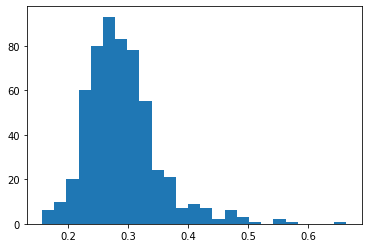

In [27]:
plt.hist(df['symmetry_worst'], 25)

(array([ 20.,  52.,  98., 105.,  93.,  52.,  45.,  36.,  23.,   8.,  12.,
         10.,   5.,   3.,   4.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.]),
 array([0.05504  , 0.0611384, 0.0672368, 0.0733352, 0.0794336, 0.085532 ,
        0.0916304, 0.0977288, 0.1038272, 0.1099256, 0.116024 , 0.1221224,
        0.1282208, 0.1343192, 0.1404176, 0.146516 , 0.1526144, 0.1587128,
        0.1648112, 0.1709096, 0.177008 , 0.1831064, 0.1892048, 0.1953032,
        0.2014016, 0.2075   ]),
 <a list of 25 Patch objects>)

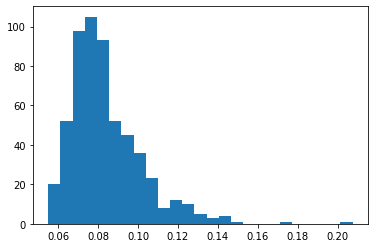

In [28]:
plt.hist(df['fractal_dimension_worst'], 25)

In [31]:
def getDistributions(df_column):
    dist = {
        "likelihood_normal":likelihood_normal(df_column),
        "likelihood_rayleigh":likelihood_rayleigh(df_column)
    }
    return {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}

In [32]:
getDistributions(df['symmetry_worst'])

{'likelihood_rayleigh': 2625.7767537959417,
 'likelihood_normal': 2781.0503388102416}

In [33]:
df1 = df.drop('diagnosis', 1)

In [34]:
df2 = df1.apply(getDistributions, axis=0)

In [35]:
df2.head()

radius_mean        {'likelihood_normal': 46.361730553097416, 'lik...
texture_mean       {'likelihood_rayleigh': 35.62868618740352, 'li...
perimeter_mean     {'likelihood_normal': 6.730556637139002, 'like...
area_mean          {'likelihood_normal': 0.4807963186226547, 'lik...
smoothness_mean    {'likelihood_rayleigh': 8600.842315869897, 'li...
dtype: object